# AirBnB Stockholm Reservation Prices Analysis

In [1]:
# Imports 

import datetime

# Import linear algebra and data manipulation
import numpy as np
import pandas as pd

# Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Introduction

Finding an accomodation is the most typical problem to be solved, when travelling to other city or country. And one of the most important things in choosing an accomodation is the reservation price. What are the main factors, which affect the reservation prices? Does time of the year influence prices and what are the busiest times of the year to visit particular city? How can we save money on the reservation?


## Approach

First of all, I chose Seattle dataset, and it will take me the following steps to come into conclusions about factors, affecting reservation prices:

    First look at the data:
        what information we have?
        what information is missing?
        discover general facts: time period, total number of listings in the dataset,
    Initial data preparation:
        remove the irrelevant information;
        reformat the information and imputing missing values;
    High level analysis:
        find out high level trends and correlations;
    Use machine learning for further analysis.

## First Look at the Data

AirBnB provided us with 1 dataset for Stockholm:

    - Listings.csv - summary information on listings in Stockholm such as: location, host information, fees, room type

In [2]:
# reading the dataset
df = pd.read_csv('listings.csv')

# findind the number of listings and the number of unique hosts
listings_number = df['id'].count()
host_numbers = len(df['host_id'].unique())

print('listings.csv dataset contains information on %d listings provided bz %d hosts' % (listings_number, host_numbers))

listings.csv dataset contains information on 4232 listings provided bz 3476 hosts


## Finding out if there are missing values in the dataset

<Axes: title={'center': 'Missing values per column, %'}>

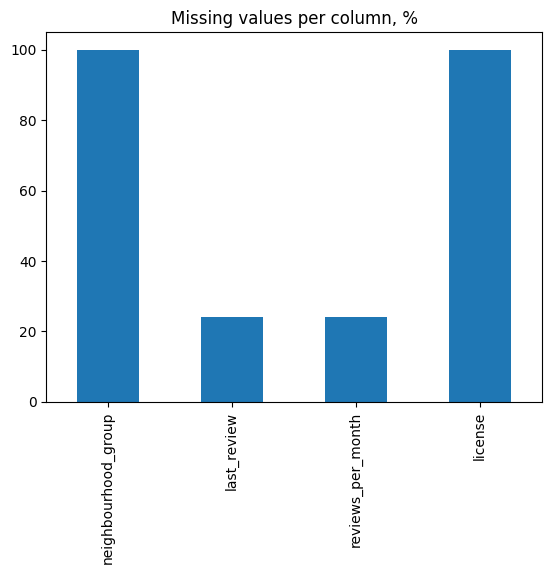

In [3]:
# finding the percentage of missing vlaues for each column

missing_data = df.isnull().mean()*100

# filtering out only columns which have missing values

missing_data_columns = missing_data[missing_data > 0]

# plotting the results

missing_data_columns.plot.bar(title='Missing values per column, %')

In the diagram above, we can see that we have missing infomration for licences and neighborhood groups in all the listings. last reviews and reviews per month were empty in 20% of the cases. We will not be using the data in our analysis anyways, so it does not impact us in any way. 

# High Level Analysis

## Listing Prices Overview

In [4]:
# finding the minimum, maximum and average price for the listings

min_price = df['price'].min()
max_price = df['price'].max()
mean_price = df['price'].mean()

print('Minimum price per listings is %d$.' % (min_price))
print('Maximum price per listings is %d$.' % (max_price))
print('Average price per listings is %d$.' % (mean_price))

Minimum price per listings is 0$.
Maximum price per listings is 601069$.
Average price per listings is 1706$.


## Average Listing Prices

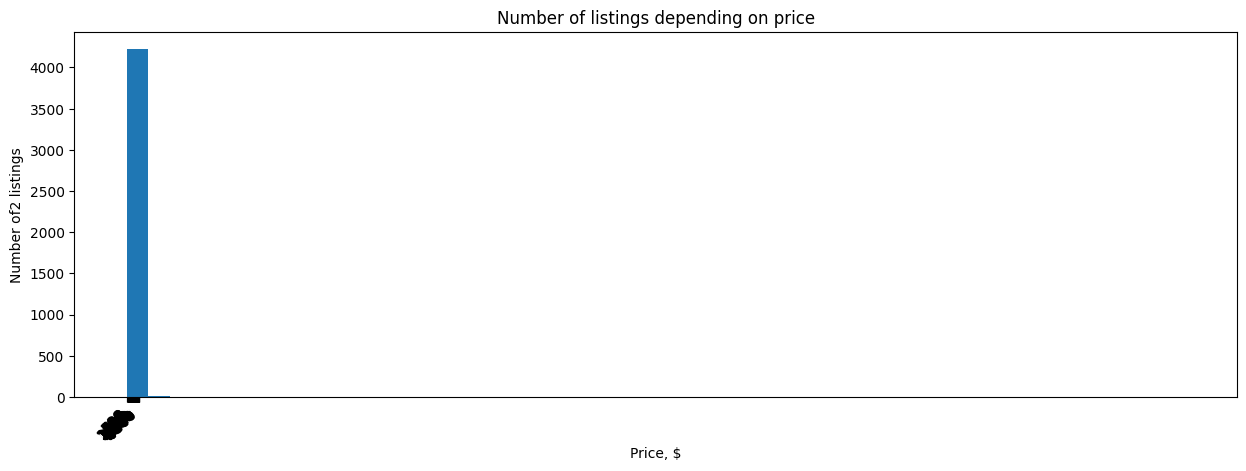

In [5]:
# getting the average price for each listing 

grouped = df.groupby('id')
mean_price_for_listing = grouped['price'].mean()

#plotting the average price per listing


plt.figure(figsize=(15,5))
plt.hist(mean_price_for_listing, bins=50)
plt.xticks(np.arange(0, 7000, step=100), rotation=45, ha='right')
plt.subplots_adjust(bottom=0.15)
plt.xlabel('Price, $')
plt.ylabel('Number of2 listings')
plt.title('Number of listings depending on price')

plt.savefig('Average listing prices')
plt.show()

## What are the busiest times of the year to visit Stockholm?

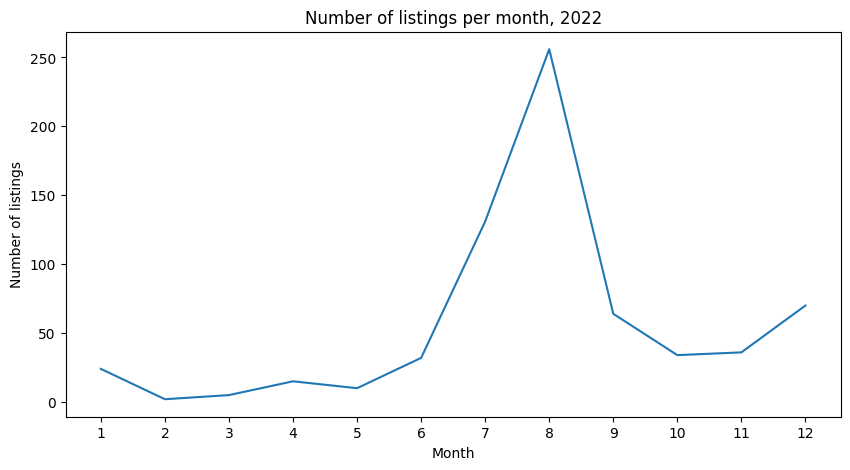

In [6]:
# extract the months first

df['month'] = pd.DatetimeIndex(df['last_review']).month
df['year'] = pd.DatetimeIndex(df['last_review']).year

number_of_listings_by_month = pd.Series([12])

for i in range(1, 13):
    number_of_listings_by_month[i] = len(df[(df['month'] == i ) & (df['year'] == 2022)]['id'].unique())

number_of_listings_by_month = number_of_listings_by_month.drop(0)

#plotting the results

plt.figure(figsize=(10,5))
plt.plot(number_of_listings_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.xlabel('Month')
plt.ylabel('Number of listings')
plt.title('Number of listings per month, 2022')

plt.savefig('Busiest times of year to visit Stockholm')
plt.show()

The diagram above show us the number of listings depending on the month in they ear 2022. We can see that the number of available listings for reseravtion tends to be the highest in the summer months. 

## Average Price per month

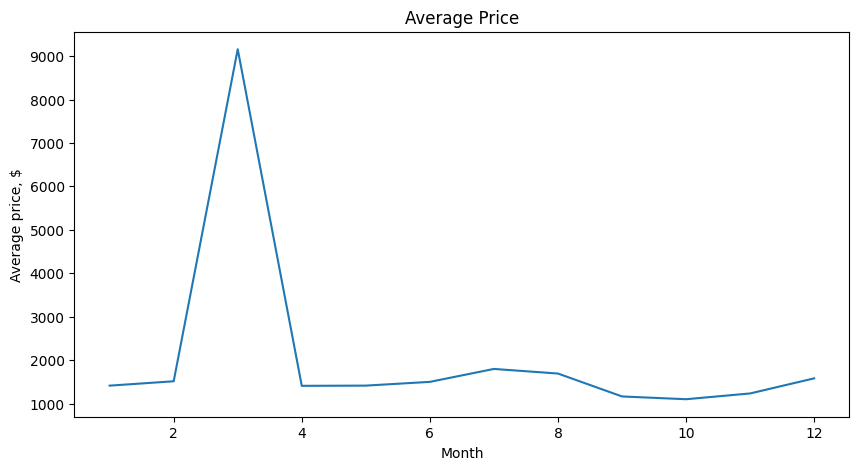

In [7]:
# finding he average price per month

average_price_per_month = df.groupby(['month'])['price'].mean()

# plotting the average price per month

plt.figure(figsize=(10,5))
plt.plot(average_price_per_month)
plt.xlabel('Month')
plt.ylabel('Average price, $')
plt.title('Average Price')

plt.savefig('Average price per month')
plt.show()

The diagram above shows us that the average prices of listings per month is consistent throughout the year, except for a large spike in the month of March. This may be due to the listing in the price range of 601069 that was reviewed in the Month of March and it significantly impacts our diagram. 

## Prices Depending on Neighborhood

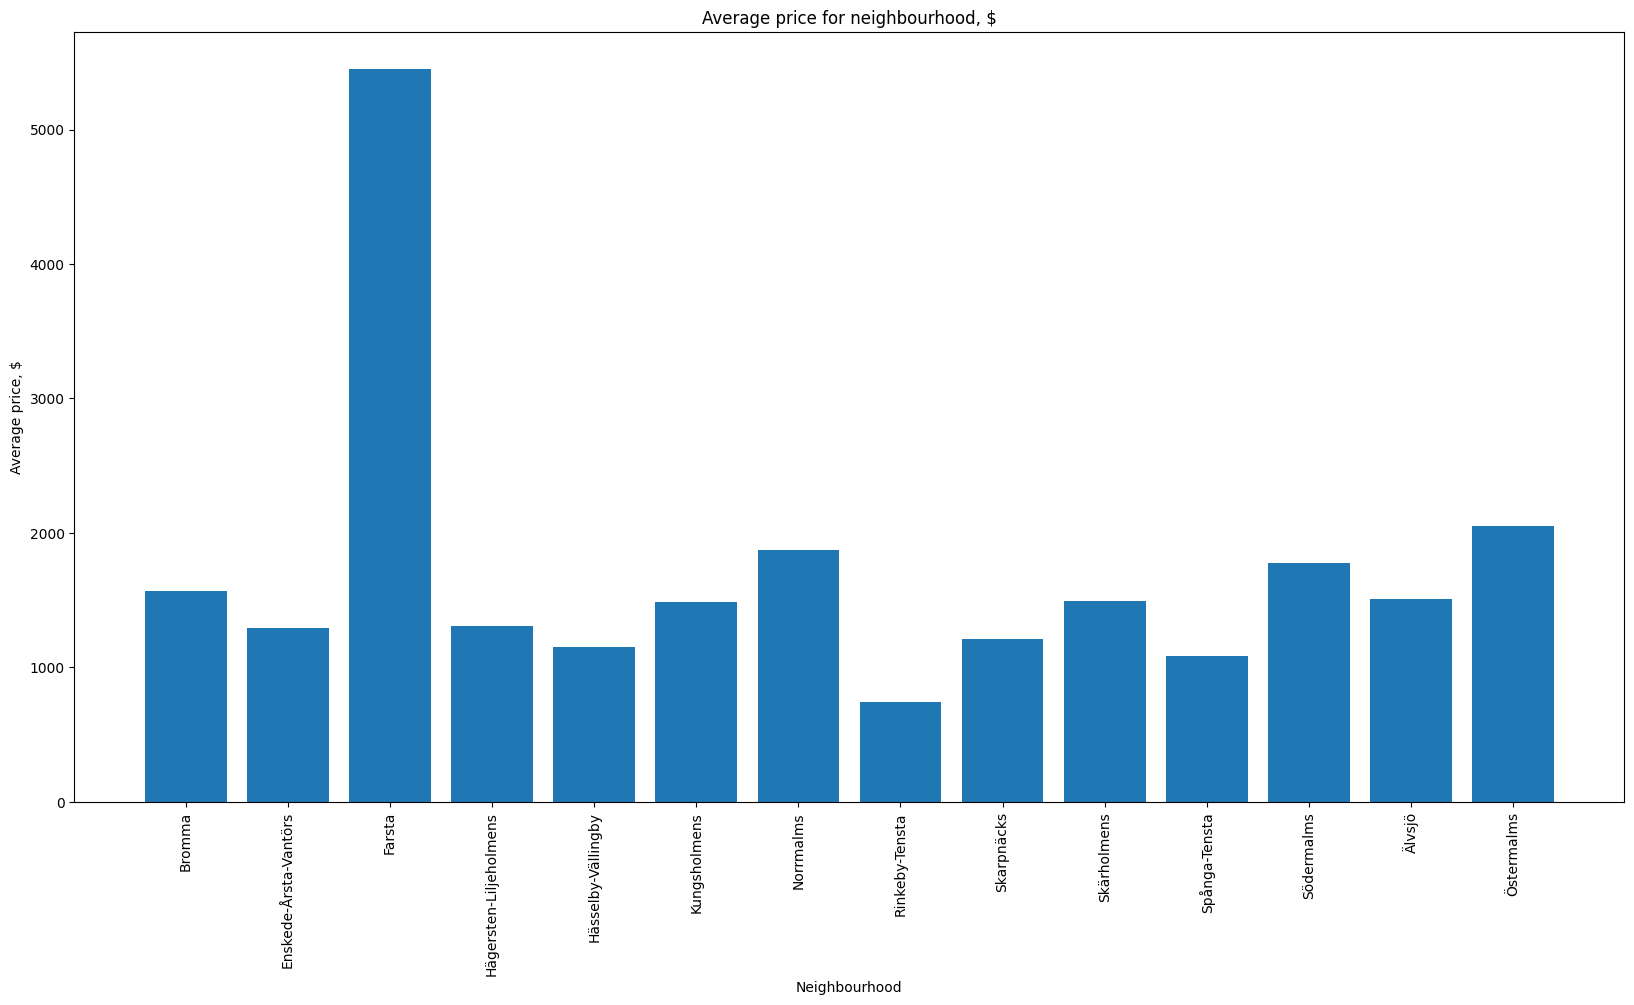

In [8]:
# getting the list of neighbourhoods 

neighbourhoods = df['neighbourhood'].unique()

# get prices by month and neighbourhood

price_by_month_neighbourhood = df.groupby('neighbourhood')['price'].mean()

#plotting prices for each neighbourhood

fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)

ax.bar(price_by_month_neighbourhood.index,
       price_by_month_neighbourhood.values)

plt.ylabel('Average price, $')
plt.xlabel('Neighbourhood')
plt.title('Average price for neighbourhood, $')

plt.xticks(rotation=90)

plt.savefig('average price per neighbourhood')
plt.show()

On the diagram above we can see that prices differ depending on the neighbourhood in Stockholm. The neighbourhood with the highest average price seems to be the one in Farsta, which is surprising as it is on the outskirts of Stockholm, and not in the middle.